# Landmarks Viewer

In this notebook, we read some images from the dataset and view the landmarks from the annotations.

In [1]:
using Images, ImageMagick, Gadfly

    .==(AbstractArray{Bool, N<:Any}, Union{DataArrays.DataArray{Bool, N<:Any}, DataArrays.PooledDataArray{Bool, R<:Integer, N<:Any}}) at /root/.julia/v0.4/DataArrays/src/broadcast.jl:330
is ambiguous with: 
    .==(Images.AbstractImageDirect{Bool, N<:Any}, AbstractArray{Bool, N<:Any}) at /root/.julia/v0.4/Images/src/algorithms.jl:135.
To fix, define 
    .==(Images.AbstractImageDirect{Bool, N<:Any}, Union{DataArrays.DataArray{Bool, N<:Any}, DataArrays.PooledDataArray{Bool, R<:Integer, N<:Any}})
before the new definition.
    .==(AbstractArray, Union{DataArrays.PooledDataArray, DataArrays.DataArray}) at /root/.julia/v0.4/DataArrays/src/broadcast.jl:285
is ambiguous with: 
    .==(Images.AbstractImageDirect{Bool, N<:Any}, AbstractArray{Bool, N<:Any}) at /root/.julia/v0.4/Images/src/algorithms.jl:135.
To fix, define 
    .==(Images.AbstractImageDirect{Bool, N<:Any}, Union{DataArrays.DataArray{Bool, N<:Any}, DataArrays.PooledDataArray{Bool, R<:Integer, N<:Any}})
before the new definition.


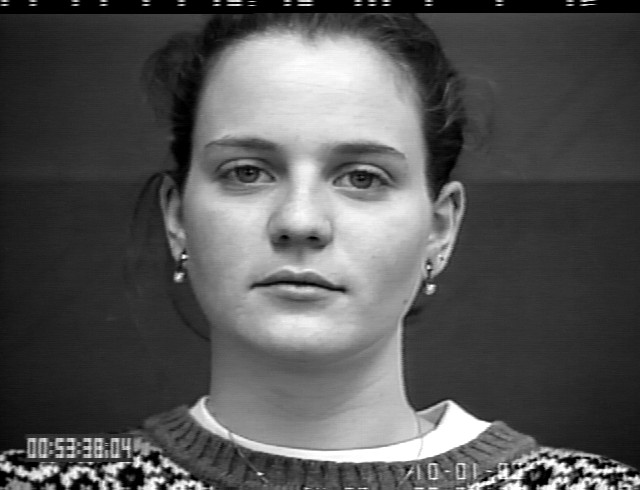

In [2]:
image = load("/home/data/ckplus/img/S100/001/S100_001_00000001.png")

In [5]:
# Database parser
getLandmarkDots(filename) = map((x)->parse(x), split(readall(filename), ['\n', ' '], limit=0, keep=false));
getLandmarkPoint(id, dots) = [dots[id*2-1], dots[id*2]];

In [6]:
dots = getLandmarkDots("/home/data/ckplus/Landmarks/S100/001/S100_001_00000001_landmarks.txt")

136-element Array{Float64,1}:
 181.333
 191.839
 183.712
 221.229
 186.614
 250.323
 190.084
 279.266
 199.901
 306.639
 218.007
 329.651
 242.417
   ⋮    
 297.656
 283.435
 313.561
 284.371
 328.846
 288.721
 313.387
 285.161
 297.658
 284.29 
 282.178
 282.546

In [17]:
x, y, l = [], [], [];
for id = 1:round(Int,length(dots) / 2)
    pt = getLandmarkPoint(id, dots)
    push!(x, pt[1])
    push!(y, size(image)[2] - pt[2])
    push!(l, string(id))
end

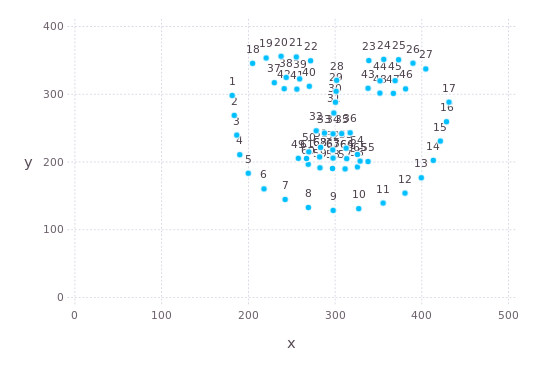

In [26]:
plot(x=x, y=y, label=l, Geom.point, Geom.label(position=:above;hide_overlaps=false))